# Decision Tree Classification
A decision tree will split data points into leafs (segments or clusters of related data points).
- The splits maximize the number of leafs by minimizing informational entropy

### Decision Tree Visualization
<img src="images/dtc/splits_example.png" height="75%" width="75%"></img>

As seen, splits were created to separate the data points into leafs, specifically called "terminal" leafs.
- The most related data points were put into a leaf, which is the concept of maximizing the number of leafs by minimizing informational entropy

#### The graph can then be modelled using a decision tree:
<img src="images/dtc/decision_tree_example.png" height="75%" width="75%"></img>
- Each leaf Node in the tree is a terminal leaf from the graph
    - They're used to classify a data point as either "Red" or "Green"
- Traverse down the tree to determine a classification for a data point

For example, let's say there's a data point of X1 = 20 and X2 = 30:
- Start the root Node, traverse the left "Yes" branch because X2 < 60
- Traverse the left "Yes" branch because X1 < 70
- Now we stopped at a "Red" terminal leaf, so the data point is classified as "Red"

In [19]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# import the data set
ads_df = pd.read_csv("datasets/social_network_ads.csv")

ads_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
# x is the Age and Estimated Salary columns
x = ads_df.iloc[:, [2, 3]].values

# y is the Purchased column
y = ads_df.iloc[:, 4].values

In [22]:
# split the data set into training and testing data sets
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

### No Need to Feature Scale!
Decision Trees don't use the "Euclidean Distance" (distance formula) method like many other classification methods, so feature scaling is actually not needed for decision trees.

However, when we plot our decision tree graph, the plot code uses an independent variable resolution of 0.01 so it would take a long time to plot if an independent variable had large numbers.

Therefore, for the sake of plotting, we're still going to feature scale the data, even though it won't make a difference for the Decision Tree classifier.

In [23]:
# import a Standarization Scaler for Feature Scaling
from sklearn.preprocessing import StandardScaler

# feature scale the training and testing sets
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

/home/pravat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/pravat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/pravat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Decision Tree Classifier

In [34]:
# import the decision tree classifier class
from sklearn.tree import DecisionTreeClassifier

In [35]:
"""
create a decision tree classifier, then fit to the training set
- set the criterion to determine a split as the informational entropy
- set the random_state (seed) to 0
"""
classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [36]:
# predict the training set results
y_pred = classifier.predict(x_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

# Confusion Matrix

In [37]:
# import the confusion matrix function
from sklearn.metrics import confusion_matrix

In [39]:
# create a confusion matrix that compares the y_test (actual) to the y_pred (prediction)
cm = confusion_matrix(y_test, y_pred)

"""
Read the Confusion Matrix diagonally:
62 + 29 = 91 correct predictions
6 + 3 = 9 incorrect predictions
"""
cm

array([[62,  6],
       [ 3, 29]])

# Training Set Visualization
We can see the decision tree is non-linear and non-continous because the prediction boundary isn't linear or a graph.

In [49]:
# import a listed color map
from matplotlib.colors import ListedColormap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


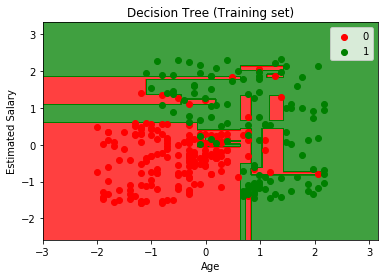

In [50]:
# create a red (Purchased) and green (Not Purchased) separation at the classifier's threshold
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# scatter each data point from the training set: red = Purchased, green = Not Purchased
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
# add labels (the axes are the two independent variables), then show the graph  
plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Testing Set Visualization
There were 9 incorrect predictions according to the Confusion Matrix, so count the number of red points in the green region and the number of green points in the red region, and it's equal to 9.

You can also visualize the splits that the decision tree created, notice how they're the same as the training set visualization.
- They're the same because the leafs from the training set are used to classify the testing set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


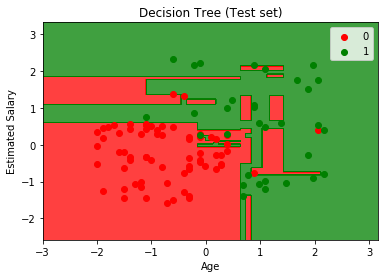

In [51]:
# create a red (Purchased) and green (Not Purchased) separation at the classifier's threshold
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# scatter each data point from the training set: red = Purchased, green = Not Purchased
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
# add labels (the axes are the two independent variables), then show the graph  
plt.title('Decision Tree (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()